<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Giotto_Time_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIOTTO-TIME

References:

https://docs-time.giotto.ai/

https://github.com/giotto-ai/giotto-time

In [2]:
!pip install giotto-time


     |████████████████████████████████| 92kB 3.7MB/s 
     |████████████████████████████████| 194kB 8.4MB/s 
     |████████████████████████████████| 378kB 9.1MB/s 
     |████████████████████████████████| 16.9MB 215kB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 40kB 4.1MB/s 
     |████████████████████████████████| 256kB 51.1MB/s 
  Created wheel for skyfield: filename=skyfield-1.39-cp37-none-any.whl size=417567 sha256=ab128ab807d0b873862c94fde7b1183badef3fe9c19e4ed464cb923424817007
  Stored in directory: /root/.cache/pip/wheels/bb/a4/a6/2f7e3bc8ec08ffc7485c92d18dd726e0dbafc0f7a8b1519518
  Created wheel for pyCalverter: filename=pyCalverter-1.6.1-cp37-none-any.whl size=4201 sha256=548fe0a031c89acfca1a2fa0cd14368acb21a80a4147addf9fa26541c833d6a9
  Stored in directory: /root/.cache/pip/wheels/77/4d/86/db4ff4eca6178dbbd5a365d095f97f6021e2a48f09908be79c
  Created wheel for jplephem: filename=jplephem-2.15-cp37-none-any.whl size=46020 sha25

# Basic Time-series Forecasting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gtime.preprocessing import TimeSeriesPreparation
from gtime.compose import FeatureCreation
from gtime.feature_extraction import Shift, MovingAverage
from gtime.feature_generation import PeriodicSeasonal, Constant, Calendar
from gtime.model_selection import horizon_shift, FeatureSplitter
from gtime.forecasting import GAR

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
def test_time_series():
    from pandas.util import testing as testing

    testing.N, testing.K = 500, 1
    df = testing.makeTimeDataFrame( freq="D" )
    return df

In [6]:
time_series = test_time_series()
print(f'Time series shape: {time_series.shape}')
print(f'Time series index type: {time_series.index.__class__}')

Time series shape: (30, 4)
Time series index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


/usr/local/lib/python3.7/dist-packages/pandas/util/__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


In [7]:
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(time_series)
print(f'Time series index type after the preprocessing: \n {period_index_time_series.index.__class__}')

Time series index type after the preprocessing: 
 <class 'pandas.core.indexes.period.PeriodIndex'>


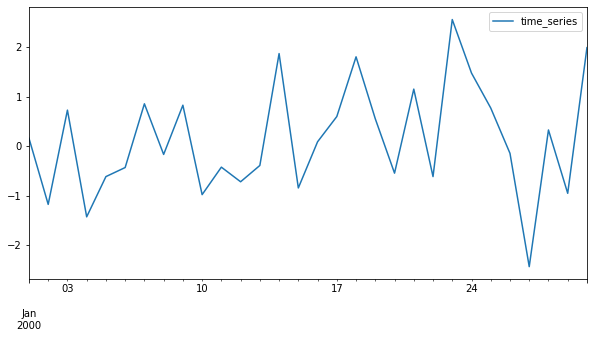

In [18]:
period_index_time_series.plot(figsize=(10, 5))
plt.show()

In [19]:

cal = Calendar(
    start_date="ignored",
    end_date="ignored",
    region="america",
    country="Brazil",
    kernel=np.array([0, 1]),
)
# New API 
dft = FeatureCreation(
    [('s0', Shift(0), ['time_series']), 
     ('s1', Shift(1), ['time_series']),
     ('ma3', MovingAverage(window_size=3), ['time_series']),
    ])

In [21]:
X = dft.fit_transform(period_index_time_series)
X.head(6)


,s0__time_series__Shift,s1__time_series__Shift,ma3__time_series__MovingAverage,cal__Calendar,ct__Constant
2000-01-25,0.772001,1.477305,1.601956,0.0,2.0
2000-01-26,-0.142176,0.772001,0.702377,0.0,2.0
2000-01-27,-2.427659,-0.142176,-0.599278,0.0,2.0
2000-01-28,0.329416,-2.427659,-0.746806,0.0,2.0
2000-01-29,-0.948387,0.329416,-1.015543,0.0,2.0
2000-01-30,1.989901,-0.948387,0.456977,0.0,2.0


In [11]:
y = horizon_shift(period_index_time_series, horizon=3)
y.head()

,y_1,y_2,y_3
2000-01-01,-1.171712,0.729488,-1.423077
2000-01-02,0.729488,-1.423077,-0.611391
2000-01-03,-1.423077,-0.611391,-0.428489
2000-01-04,-0.611391,-0.428489,0.857282
2000-01-05,-0.428489,0.857282,-0.164129


In [12]:
feature_splitter = FeatureSplitter()
X_train, y_train, X_test, y_test = feature_splitter.transform(X, y)
X_train.tail()

,s0__time_series__Shift,s1__time_series__Shift,ma3__time_series__MovingAverage
2000-01-23,2.556562,-0.611135,1.032918
2000-01-24,1.477305,2.556562,1.140911
2000-01-25,0.772001,1.477305,1.601956
2000-01-26,-0.142176,0.772001,0.702377
2000-01-27,-2.427659,-0.142176,-0.599278


In [13]:
X_test


,s0__time_series__Shift,s1__time_series__Shift,ma3__time_series__MovingAverage
2000-01-28,0.329416,-2.427659,-0.746806
2000-01-29,-0.948387,0.329416,-1.015543
2000-01-30,1.989901,-0.948387,0.456977


In [14]:
y_train.tail()


,y_1,y_2,y_3
2000-01-23,1.477305,0.772001,-0.142176
2000-01-24,0.772001,-0.142176,-2.427659
2000-01-25,-0.142176,-2.427659,0.329416
2000-01-26,-2.427659,0.329416,-0.948387
2000-01-27,0.329416,-0.948387,1.989901


In [15]:
y_test

,y_1,y_2,y_3
2000-01-28,-0.948387,1.989901,NaN
2000-01-29,1.989901,NaN,NaN
2000-01-30,NaN,NaN,NaN


In [16]:
lr = LinearRegression()
model = GAR(lr)
model = model.fit(X_train, y_train)

In [17]:
predictions = model.predict(X_test)
predictions

,y_1,y_2,y_3
2000-01-28,-0.081028,0.820356,0.555104
2000-01-29,0.710167,0.466966,-0.085525
2000-01-30,0.022575,0.640558,-0.235207


### Thank you for your time